---
title: "Test 1"
format: 
  html: 
    toc: true
    css: styles.css
    echo: false
jupyter: python3
execute:
  echo: false # Hides all code globally
---

In [1]:
from util import Skim
from util import SkimCompare

In [2]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
base_skim = Skim() #no label initially
#read 5 matrices from transit AM skims
base_skim.skimReader(
    scenario_path=r'T:\STORAGE-63T\2025RP_draft\abm_runs_v2\2022_S0_v2',
    skim='transit',
    time_periods='AM',
    desc_label='EMME 4.3.7 Base Year Scenario'
)

In [4]:
comp_skim = Skim()
comp_skim.skimReader(
    scenario_path=r'T:\STORAGE-63T\ABM3_EMME_upgrade\2022_S0_v2_op',
    skim='transit',
    time_periods='AM',
    desc_label='EMME 4.3.7 Scenario in OpenPaths'
)

In [5]:
print('Scenarios to be compared: ' + base_skim.desc_label + ' VS ' + comp_skim.desc_label)

Scenarios to be compared: EMME 4.3.7 Base Year Scenario VS EMME 4.3.7 Scenario in OpenPaths


# Scatterplot Comparison of AM Peak for WALK PRM modes assignment

Scatterplot comparison of AM Peak total actual in-vehicle travel time by walk premium

Intercept: -0.0000
Slope: 1.0000
R² Score: 1.0000
RMSE: 0.0085


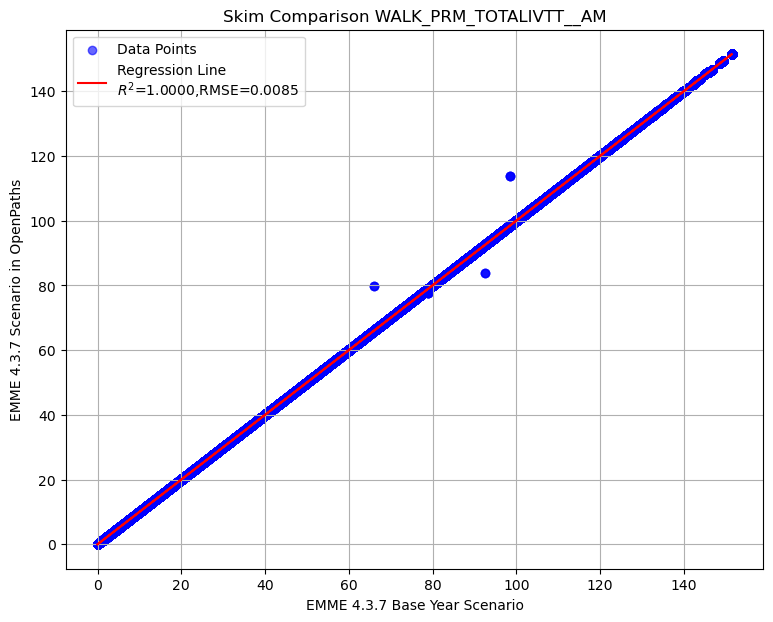

In [6]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim,'WALK_PRM_TOTALIVTT__AM')

Scatterplot comparison of AM Peak actual in-vehicle travel time on LRT mode by walk premium

Intercept: -0.0000
Slope: 1.0000
R² Score: 1.0000
RMSE: 0.0050


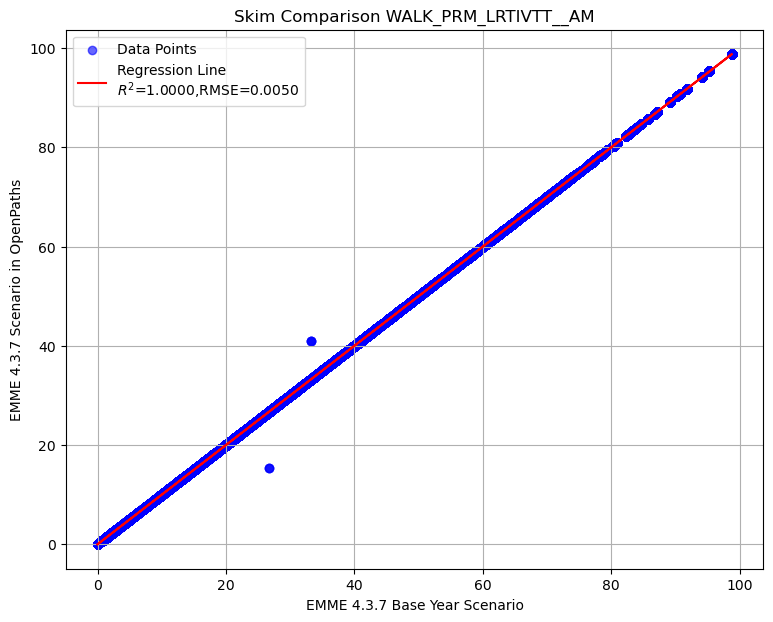

In [7]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim,'WALK_PRM_LRTIVTT__AM')

Scatterplot comparison of AM Peak actual in-vehicle travel time on commuter rail mode by walk premium

Intercept: -0.0000
Slope: 1.0000
R² Score: 1.0000
RMSE: 0.0144


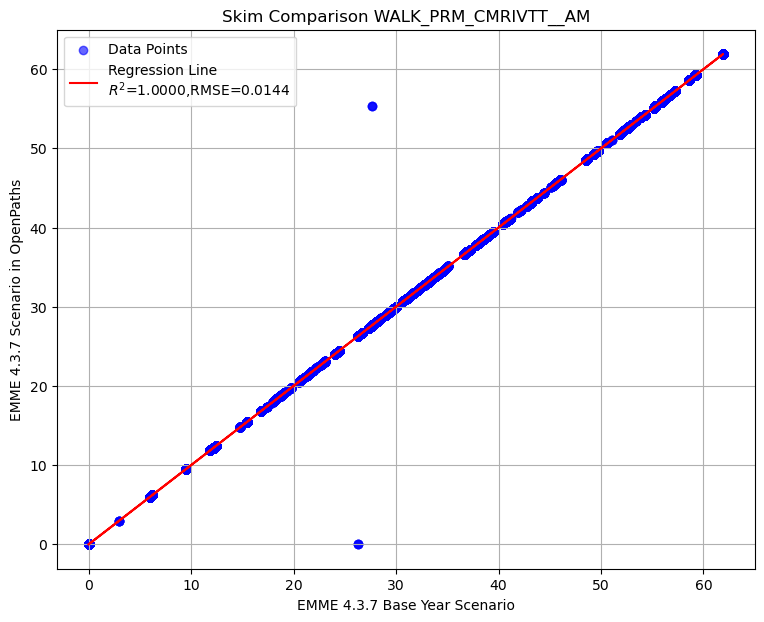

In [8]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim,'WALK_PRM_CMRIVTT__AM')

Scatterplot comparison of AM Peak actual in-vehicle travel time on express bus mode by walk premium

Intercept: 0.0000
Slope: 1.0000
R² Score: 1.0000
RMSE: 0.0012


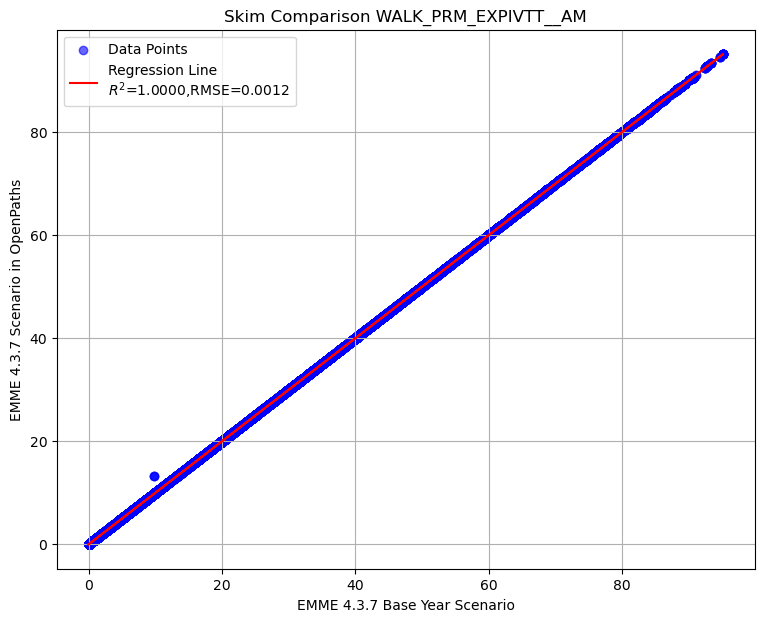

In [9]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim,'WALK_PRM_EXPIVTT__AM')

Scatterplot comparison of AM Peak actual in-vehicle travel time on BRT mode by walk premium

Intercept: -0.0000
Slope: 1.0000
R² Score: 1.0000
RMSE: 0.0178


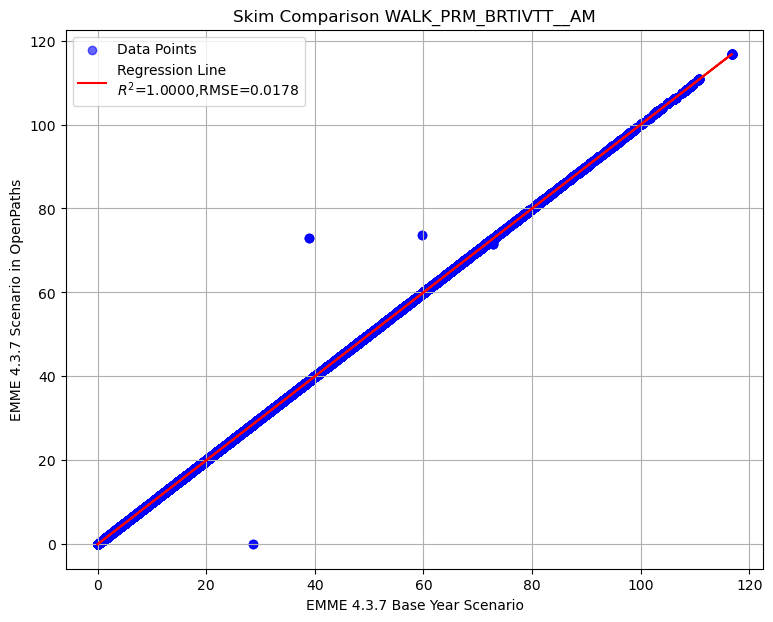

In [10]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim,'WALK_PRM_BRTIVTT__AM')

Intercept: -0.0000
Slope: 1.0000
R² Score: 1.0000
RMSE: 0.0000


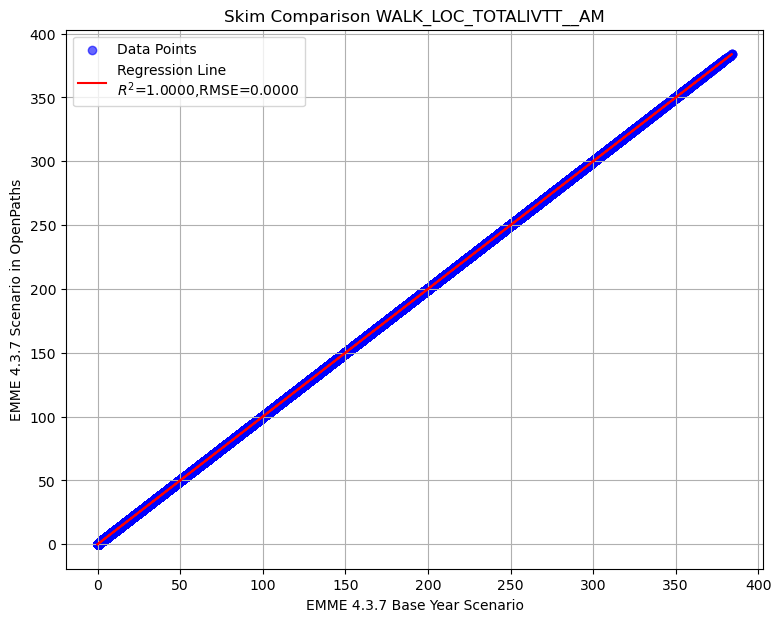

In [11]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim,'WALK_LOC_TOTALIVTT__AM')

Intercept: 0.0975
Slope: 0.9990
R² Score: 0.9980
RMSE: 2.1459


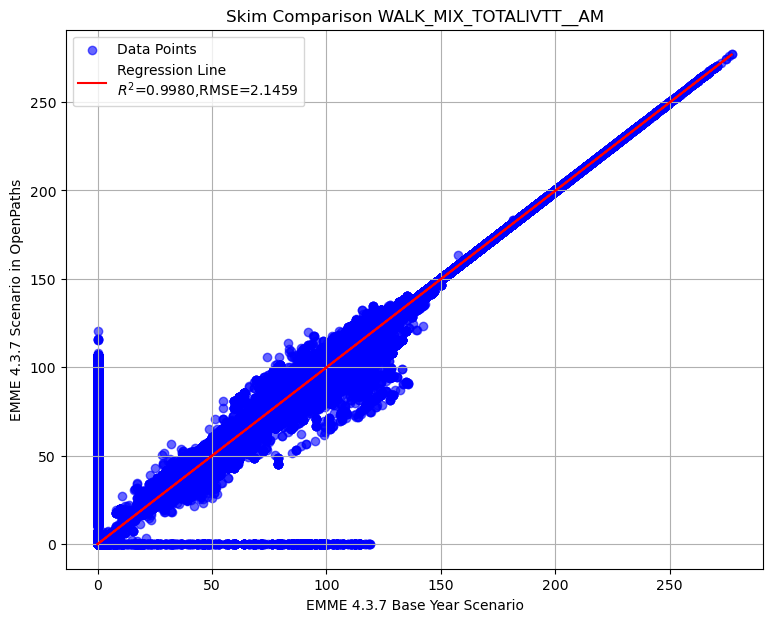

In [12]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim,'WALK_MIX_TOTALIVTT__AM')

# Summary of transit AM skim comparison (EMME OpenPath - EMME 4.3.7)

To display the top 5 rows of skim comparison (sort by WALK_PRM_TOTALIVTT__AM)

In [13]:
# generate comparison
comparison = SkimCompare.comparison(base_skim.skim_df, comp_skim.skim_df)

In [14]:
comparison.sort_values(by='WALK_PRM_TOTALIVTT__AM', ascending=False).head().round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_BRTIVTT__AM,WALK_LOC_TOTALIVTT__AM,WALK_MIX_TOTALIVTT__AM
789,176,15.48,7.56,-26.31,0,34.22,0,0
814,176,15.48,7.56,-26.31,0,34.22,0,0
629,176,15.48,7.56,-26.31,0,34.22,0,0
699,176,15.48,7.56,-26.31,0,34.22,0,0
3140,1338,13.98,0,0,0,13.98,0,0


Below is the summary of selected matrices difference in transit AM skim

In [15]:
comparison_excluded = comparison.drop(columns=['Origin', 'Destination'])
desc = comparison_excluded.describe().applymap(lambda x: f"{x:,.2f}").style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
)
desc

,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_BRTIVTT__AM,WALK_LOC_TOTALIVTT__AM,WALK_MIX_TOTALIVTT__AM
count,"24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00"
mean,0.00,-0.00,-0.00,0.00,0.00,0.00,0.06
std,0.01,0.00,0.01,0.00,0.02,0.00,2.15
min,-8.65,-11.25,-26.31,-0.00,-28.57,-0.00,-119.20
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,15.48,7.56,27.65,3.53,34.22,0.00,120.64


Let's check the records with difference in WALK_PRM_LRTIVTT__AM greater than 50

In [16]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__AM']>7].round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_BRTIVTT__AM,WALK_LOC_TOTALIVTT__AM,WALK_MIX_TOTALIVTT__AM
629,176,15.48,7.56,-26.31,0,34.22,0,0
699,176,15.48,7.56,-26.31,0,34.22,0,0
789,176,15.48,7.56,-26.31,0,34.22,0,0
814,176,15.48,7.56,-26.31,0,34.22,0,0


Let's check the records with difference in WALK_PRM_LRTIVTT__AM less than -50

In [17]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__AM']<-11].round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_BRTIVTT__AM,WALK_LOC_TOTALIVTT__AM,WALK_MIX_TOTALIVTT__AM
419,1250,-8.65,-11.25,27.65,3.53,-28.57,0,0
419,1338,-8.65,-11.25,27.65,3.53,-28.57,0,0
419,1348,-8.65,-11.25,27.65,3.53,-28.57,0,0
